In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import matplotlib.pyplot as plt
import os
import random
from lime import lime_image
from skimage.segmentation import mark_boundaries
from PIL import Image
from IPython.display import display


from Utilities.processing_files import split_to_train_test
from Utilities.generators import create_ultra_test_generator, create_generators
from Utilities.output import plot_history, print_confusion_matrix, get_y_pred
from Utilities.models import load_netv2_model, create_model, load_model

In [2]:
categories=("A", "B", "C", "D", "E", "F")
NUM_OUTPUTS= len(categories)
IMG_SIZE=(322, 322)
input_shape = IMG_SIZE + (3,)
BATCH_SIZE = 56
N_VALIDATION = 0.1


In [3]:
def load_random_photo(folder):
    files = os.listdir(folder)
    random_file = random.choice(files)
    
    img = cv2.imread(folder+"/"+random_file)
    img = transform_photo(img)
    class_img=random_file[0]
    return img, class_img

def show_random_photo_from_category(folder, category):
    folder =os.path.join(folder, category)
    files = os.listdir(folder)
    random_file = random.choice(files)
    
    img = cv2.imread(folder+"/"+random_file)
    img = transform_photo(img)
    
    #fig = plt.figure(figsize=(20,10))
    #plt.imshow(img)
    #plt.title("Category: "+category)
    #plt.show()
    return img


def transform_photo(img):
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return new_img

def show_photo(img, category):
    print("Kategoria zdjęcia: " +category)
    fig = plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()
    

                     

# DATA_HUNTERS - DL PROJECT

## Arek
## Marta
## Paulina
## Asia

# CEL PROJEKTU 

### Rozpoznawanie klas jabłek w fabryce dżemów

# DANE

### Zdjęcia jabłek pogrupowane w 6 klas pod względem ich rodzaju

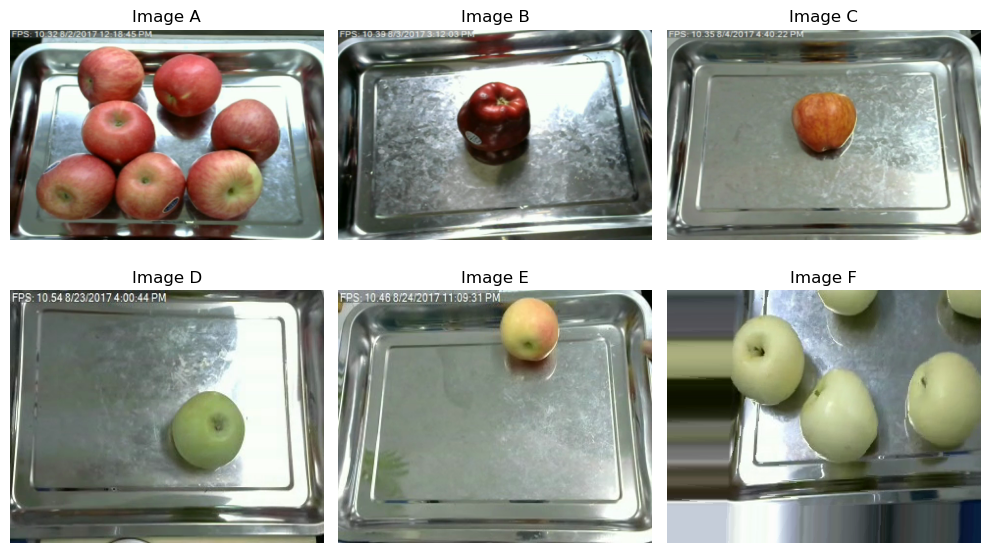

In [8]:
paths = ["Apple_A.png", "Apple_B.png", "Apple_C.png", "Apple_D.png", "Apple_E.png", "Apple_F.png"]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    image = Image.open(paths[i])
    ax.imshow(image)
    ax.set_title("Image {}".format(paths[i][6]))  # Dodaj tytuł zdjęcia
    ax.axis('off')

plt.tight_layout()
plt.show()

# MODEL

In [ ]:
#     split_to_train_test("data/")
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
train_generator, val_generator, test_generator = create_generators("data", batch_size= BATCH_SIZE, n_val = N_VALIDATION)

Found 5033 images belonging to 6 classes.
Found 556 images belonging to 6 classes.
Found 546 images belonging to 6 classes.


In [12]:
ultra_test_generator = create_ultra_test_generator("data", batch_size= BATCH_SIZE)

Found 26 images belonging to 6 classes.


Function to split data to usefull folders

In [5]:
model = create_model(IMG_SIZE + (3,), NUM_OUTPUTS)
#model.summary()
#model = models.load_netv2_model(IMG_SIZE + (3,), NUM_OUTPUTS)

In [6]:
history = model.fit_generator(generator=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps= len(val_generator)
                             )

C:\Users\arkad\AppData\Local\Temp\ipykernel_32368\3609751689.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/10
 2/90 [..............................] - ETA: 6:47 - loss: 1.8529 - accuracy: 0.1964

KeyboardInterrupt: 

In [7]:
acc = []
val_acc = []
for i in range(len(history.history["accuracy"])):
    acc.append( history.history["accuracy"][i])
    val_acc.append( history.history["val_accuracy"][i])
hist_df = pd.DataFrame({"# Epoch": [e for e in range(1,len(acc)+1)],"Accuracy": acc, "Val_accuracy": val_acc})
hist_df.plot(x = "# Epoch", y = ["Accuracy","Val_accuracy"])
plt.title("Accuracy vs Validation Accuracy")
plt.show()

NameError: name 'history' is not defined

In [13]:
model_my=load_model('models/my_model.keras')

In [9]:
model_net=load_model('models/net2_model.keras')

In [ ]:
plot_history(history)


In [24]:
y_pred_my= get_y_pred(model_my, test_generator)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_net, target_names=categories))

C:\Users\arkad\Projekty DataHunters\jdszr9-data_hunters\4 Deep Learning - Types of apples\Utilities\output.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


10/10 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

           A       0.98      1.00      0.99        61
           B       1.00      0.99      0.99        79
           C       1.00      1.00      1.00        68
           D       0.99      1.00      0.99        73
           E       1.00      1.00      1.00        55
           F       1.00      1.00      1.00       210

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



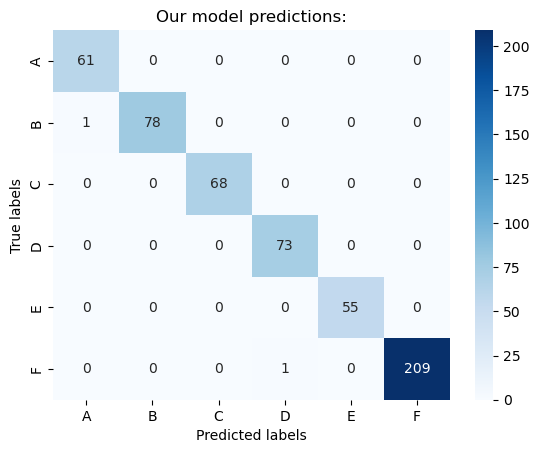

In [17]:
print_confusion_matrix(y_true, y_pred_my, "Our model predictions:", categories)

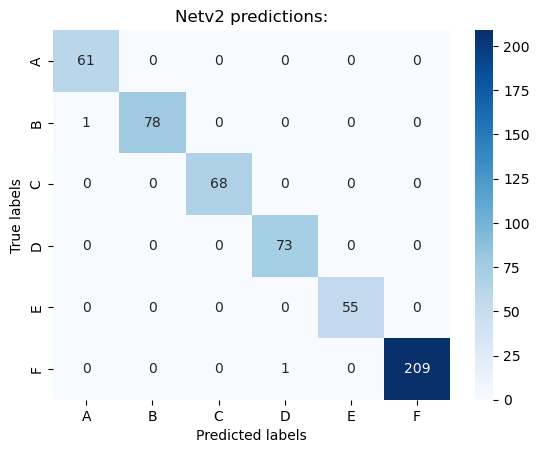

In [18]:
print_confusion_matrix(y_true, y_pred_net, "Netv2 predictions:", categories)

In [20]:
y_pred_net_ultra= get_y_pred(model_net, ultra_test_generator)
y_true_ultra = ultra_test_generator.classes

print(classification_report(y_true_ultra, y_pred_net_ultra, target_names=categories))

NameError: name 'model_net' is not defined

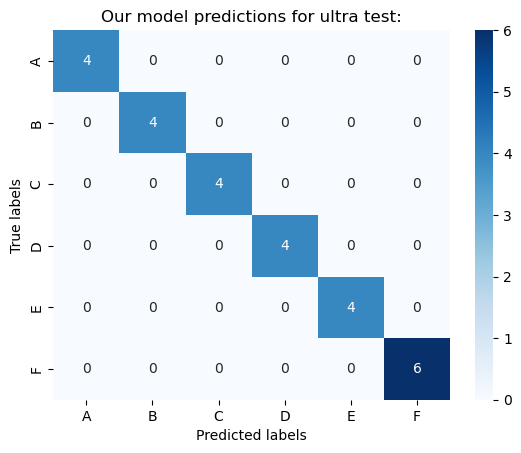

In [16]:
print_confusion_matrix(y_true_ultra, y_pred_net_ultra, "Our model predictions for ultra test:", categories)

In [21]:
y_pred_net_ultra= get_y_pred(model_my, ultra_test_generator)
y_true_ultra = ultra_test_generator.classes

print(classification_report(y_true_ultra, y_pred_net_ultra, target_names=categories))

C:\Users\arkad\Projekty DataHunters\jdszr9-data_hunters\4 Deep Learning - Types of apples\Utilities\output.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


1/1 [==============================] - 1s 536ms/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       1.00      1.00      1.00         4
           C       1.00      1.00      1.00         4
           D       1.00      1.00      1.00         4
           E       1.00      1.00      1.00         4
           F       1.00      1.00      1.00         6

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



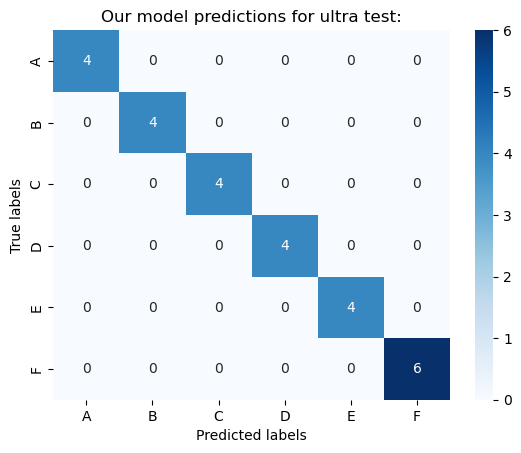

In [22]:
print_confusion_matrix(y_true_ultra, y_pred_net_ultra, "Our model predictions for ultra test:", categories)

# Błędy:

In [25]:
PRED= y_pred_my
GENERATOR=test_generator
MODEL=model_my

C:\Users\arkad\Projekty DataHunters\jdszr9-data_hunters\4 Deep Learning - Types of apples\Utilities\output.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


10/10 [==============================] - 13s 1s/step
20
[0. 1. 0. 0. 0. 0.]


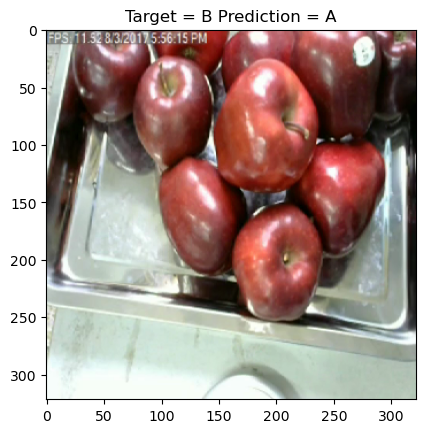

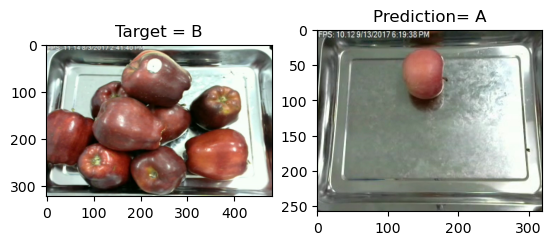

46
[0. 0. 0. 0. 0. 1.]


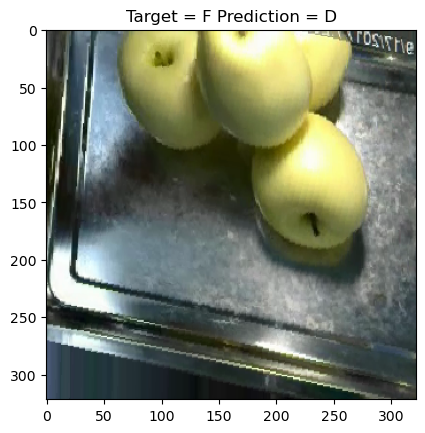

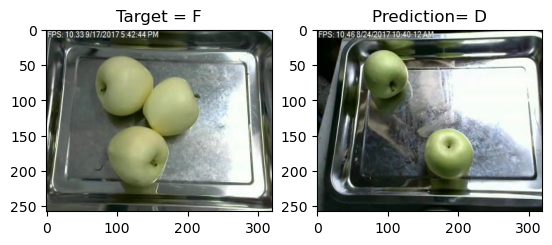

In [26]:
PRED= get_y_pred(MODEL, GENERATOR)
y_true = GENERATOR.classes



different_indices = np.where(y_true != PRED)[0]
different_indices


n_batch=0
for batch in GENERATOR:
    X_batch, y_batch = batch
    for i in different_indices:
        if i > n_batch* BATCH_SIZE and i < (n_batch+1) * BATCH_SIZE:
            cat_True=categories[y_true[i]]
            cat_Predict= categories[PRED[i]]
            print(i-n_batch* BATCH_SIZE)
            image = batch[0][i-n_batch* BATCH_SIZE]
            plt.imshow(image)
            plt.title(f'Target = {cat_True} Prediction = {cat_Predict}')
            
            print(y_batch[i-n_batch* BATCH_SIZE])
            
            fig, axes = plt.subplots(1, 2)    
            
            axes[0].imshow(show_random_photo_from_category('data/test',cat_True))
            axes[1].imshow(show_random_photo_from_category('data/test',cat_Predict))
            axes[0].set_title("Target = "+cat_True)
            axes[1].set_title("Prediction= "+cat_Predict)   
            
            #plt.imshow(image)
            #plt.axis('off')
            #plt.title(f'Target = {cat_True} Prediction = {cat_Predict}')
            plt.show()
    
    if different_indices[-1]<n_batch* BATCH_SIZE:
        break
    n_batch+=1

# Wyjaśnialność: 

In [27]:
explainer = lime_image.LimeImageExplainer()

In [29]:
explanation = explainer.explain_instance(image.astype('double'), model_my.predict,  
                                         top_labels=3, hide_color=0, num_samples=50)

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 188ms/step


(-0.5, 321.5, 321.5, -0.5)

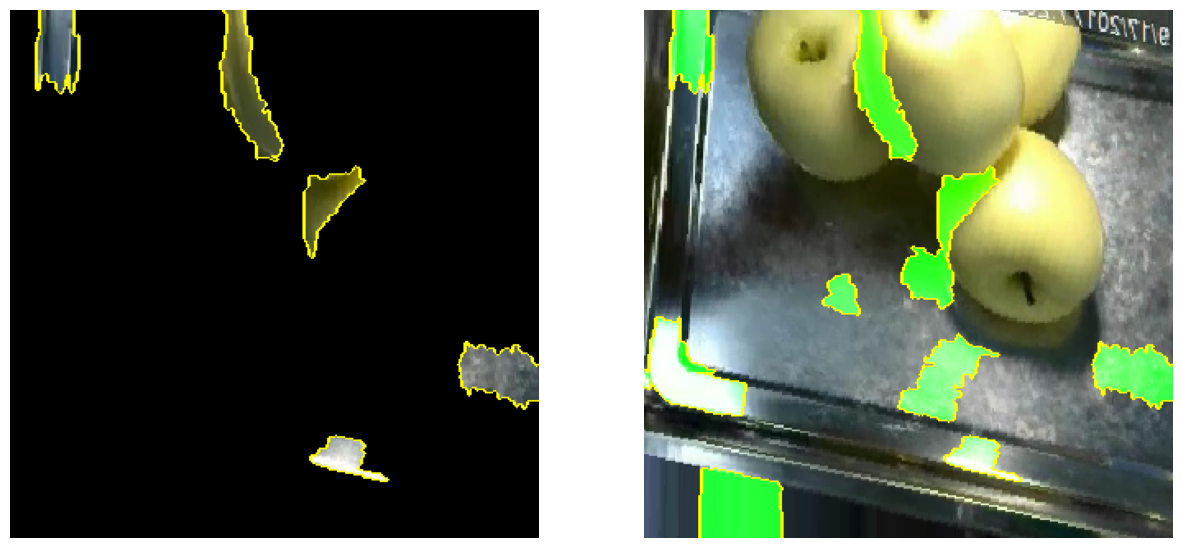

In [31]:


temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
#model.save('models/my_model.keras')
model.save('/content/drive/MyDrive/4 Deep Learning - Types of apples/data/my_model.keras')


In [ ]:
#model.save('models/netv2_model.keras')
model.save('/content/drive/MyDrive/4 Deep Learning - Types of apples/data/net2_model.keras')